## Heart Attack Risk Prediction using Deep Learning Techniques

#### The goal is to develop a predictive model using Artificial Neural Networks (ANNs) to identify the likelihood of a heart attack based on patient data.

## Data Overview
### Rows: 2,39,266
### Columns: 28
### Includes both numeric and categorical variables.

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [811]:
dataset = pd.read_csv('heart_attack_china.csv')
dataset.head()

,Patient_ID,Age,Gender,Smoking_Status,Hypertension,Diabetes,Obesity,Cholesterol_Level,Air_Pollution_Exposure,Physical_Activity,...,Hospital_Availability,TCM_Use,Employment_Status,Education_Level,Income_Level,Blood_Pressure,Chronic_Kidney_Disease,Previous_Heart_Attack,CVD_Risk_Score,Heart_Attack
0,1,55,Male,Non-Smoker,No,No,Yes,Normal,High,High,...,Low,Yes,Unemployed,Primary,Low,104,Yes,No,78,No
1,2,66,Female,Smoker,Yes,No,No,Low,Medium,High,...,High,No,Unemployed,Secondary,Middle,142,No,No,49,No
2,3,69,Female,Smoker,No,No,No,Low,Medium,High,...,Low,No,Unemployed,Primary,High,176,No,No,31,No
3,4,45,Female,Smoker,No,Yes,No,Normal,Medium,Low,...,Medium,Yes,Employed,Primary,Low,178,No,Yes,23,No
4,5,39,Female,Smoker,No,No,No,Normal,Medium,Medium,...,Low,No,Retired,Higher,Middle,146,Yes,No,79,No


In [812]:
dataset.columns

Index(['Patient_ID', 'Age', 'Gender', 'Smoking_Status', 'Hypertension',
       'Diabetes', 'Obesity', 'Cholesterol_Level', 'Air_Pollution_Exposure',
       'Physical_Activity', 'Diet_Score', 'Stress_Level',
       'Alcohol_Consumption', 'Family_History_CVD', 'Healthcare_Access',
       'Rural_or_Urban', 'Region', 'Province', 'Hospital_Availability',
       'TCM_Use', 'Employment_Status', 'Education_Level', 'Income_Level',
       'Blood_Pressure', 'Chronic_Kidney_Disease', 'Previous_Heart_Attack',
       'CVD_Risk_Score', 'Heart_Attack'],
      dtype='object')

In [813]:
dataset.shape

(239266, 28)

In [950]:
dataset['Heart_Attack'].value_counts()

Heart_Attack
0    210195
1     29071
Name: count, dtype: int64

In [946]:
dataset[dataset['Heart_Attack'] == 1]

,Age,Gender,Smoking_Status,Hypertension,Diabetes,Obesity,Cholesterol_Level,Air_Pollution_Exposure,Physical_Activity,Diet_Score,...,Province,Hospital_Availability,TCM_Use,Employment_Status,Income_Level,Blood_Pressure,Chronic_Kidney_Disease,Previous_Heart_Attack,CVD_Risk_Score,Heart_Attack
9,47,0,1,0,0,1,1,0,1,1,...,0,1,0,0,0,125,0,0,67,1
23,48,1,1,1,0,0,2,2,2,1,...,6,0,0,0,2,168,0,1,41,1
29,82,1,0,0,0,1,0,1,0,1,...,7,2,1,2,2,147,0,0,99,1
38,69,1,1,0,0,0,1,2,0,2,...,6,2,1,1,1,126,0,0,81,1
44,48,0,0,0,1,0,0,2,1,0,...,5,2,0,0,0,160,0,0,92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239230,31,1,1,1,0,0,1,1,2,0,...,5,2,0,2,0,116,1,0,59,1
239235,76,0,1,0,0,0,0,1,1,0,...,5,0,0,1,2,121,0,0,72,1
239247,39,1,1,0,0,0,0,1,0,1,...,3,2,0,1,0,163,0,0,69,1
239261,53,1,0,0,0,0,2,2,2,0,...,3,0,1,1,1,167,0,0,86,1


## Statistical analysis

In [815]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239266 entries, 0 to 239265
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Patient_ID              239266 non-null  int64 
 1   Age                     239266 non-null  int64 
 2   Gender                  239266 non-null  object
 3   Smoking_Status          239266 non-null  object
 4   Hypertension            239266 non-null  object
 5   Diabetes                239266 non-null  object
 6   Obesity                 239266 non-null  object
 7   Cholesterol_Level       239266 non-null  object
 8   Air_Pollution_Exposure  239266 non-null  object
 9   Physical_Activity       239266 non-null  object
 10  Diet_Score              239266 non-null  object
 11  Stress_Level            239266 non-null  object
 12  Alcohol_Consumption     239266 non-null  object
 13  Family_History_CVD      239266 non-null  object
 14  Healthcare_Access       239266 non-n

In [816]:
dataset.describe()

,Patient_ID,Age,Blood_Pressure,CVD_Risk_Score
count,239266.000000,239266.000000,239266.000000,239266.000000
mean,119633.500000,59.466284,134.513378,54.485581
std,69070.289091,17.348308,25.991827,25.987743
min,1.000000,30.000000,90.000000,10.000000
25%,59817.250000,44.000000,112.000000,32.000000
50%,119633.500000,59.000000,135.000000,54.000000
75%,179449.750000,75.000000,157.000000,77.000000
max,239266.000000,89.000000,179.000000,99.000000


## EDA Process

In [818]:
dataset.isnull().sum()

Patient_ID                    0
Age                           0
Gender                        0
Smoking_Status                0
Hypertension                  0
Diabetes                      0
Obesity                       0
Cholesterol_Level             0
Air_Pollution_Exposure        0
Physical_Activity             0
Diet_Score                    0
Stress_Level                  0
Alcohol_Consumption           0
Family_History_CVD            0
Healthcare_Access             0
Rural_or_Urban                0
Region                        0
Province                      0
Hospital_Availability         0
TCM_Use                       0
Employment_Status             0
Education_Level           59617
Income_Level                  0
Blood_Pressure                0
Chronic_Kidney_Disease        0
Previous_Heart_Attack         0
CVD_Risk_Score                0
Heart_Attack                  0
dtype: int64

In [819]:
# Checking the missing values

dataset[dataset['Education_Level'].isnull()].head()

,Patient_ID,Age,Gender,Smoking_Status,Hypertension,Diabetes,Obesity,Cholesterol_Level,Air_Pollution_Exposure,Physical_Activity,...,Hospital_Availability,TCM_Use,Employment_Status,Education_Level,Income_Level,Blood_Pressure,Chronic_Kidney_Disease,Previous_Heart_Attack,CVD_Risk_Score,Heart_Attack
7,8,88,Male,Non-Smoker,Yes,No,Yes,Low,High,Low,...,High,No,Retired,NaN,Low,162,No,No,27,No
9,10,47,Female,Smoker,No,No,Yes,Low,High,Low,...,Low,No,Employed,NaN,High,125,No,No,67,Yes
10,11,62,Male,Non-Smoker,No,No,No,Low,High,Medium,...,High,Yes,Unemployed,NaN,Low,133,No,No,94,No
15,16,83,Male,Non-Smoker,No,No,No,Low,Low,Medium,...,High,No,Employed,NaN,Low,171,No,Yes,51,No
19,20,62,Female,Smoker,Yes,Yes,No,Normal,Low,Medium,...,Low,No,Employed,NaN,Low,176,No,No,36,No


In [820]:
# Remove columns

dataset.drop(columns=['Education_Level', 'Patient_ID'], inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [821]:
dataset.shape

(239266, 26)

In [822]:
# Finding the duplicates

dataset.duplicated().any()

False

In [823]:
#Identify and separate categorical and numerical columns
# Separate categorical and numerical columns

categorical_cols = dataset.select_dtypes(include='object').columns.tolist()
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print('\n')
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['Gender', 'Smoking_Status', 'Hypertension', 'Diabetes', 'Obesity', 'Cholesterol_Level', 'Air_Pollution_Exposure', 'Physical_Activity', 'Diet_Score', 'Stress_Level', 'Alcohol_Consumption', 'Family_History_CVD', 'Healthcare_Access', 'Rural_or_Urban', 'Region', 'Province', 'Hospital_Availability', 'TCM_Use', 'Employment_Status', 'Income_Level', 'Chronic_Kidney_Disease', 'Previous_Heart_Attack', 'Heart_Attack']


Numerical Columns: ['Age', 'Blood_Pressure', 'CVD_Risk_Score']


##  Visualization 

### Histogram

In [826]:
def plot_hist_kde(col, dataset):
    plt.figure(figsize=(8, 5))
    sns.histplot(dataset[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [827]:
dataset.columns

Index(['Age', 'Gender', 'Smoking_Status', 'Hypertension', 'Diabetes',
       'Obesity', 'Cholesterol_Level', 'Air_Pollution_Exposure',
       'Physical_Activity', 'Diet_Score', 'Stress_Level',
       'Alcohol_Consumption', 'Family_History_CVD', 'Healthcare_Access',
       'Rural_or_Urban', 'Region', 'Province', 'Hospital_Availability',
       'TCM_Use', 'Employment_Status', 'Income_Level', 'Blood_Pressure',
       'Chronic_Kidney_Disease', 'Previous_Heart_Attack', 'CVD_Risk_Score',
       'Heart_Attack'],
      dtype='object')

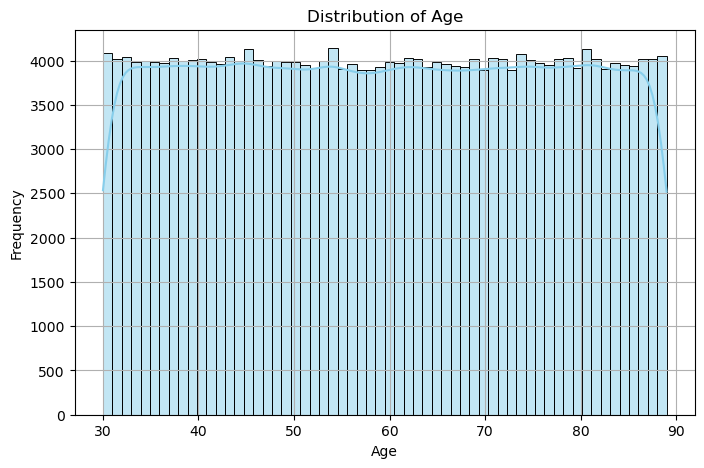

In [828]:
plot_hist_kde('Age',dataset)

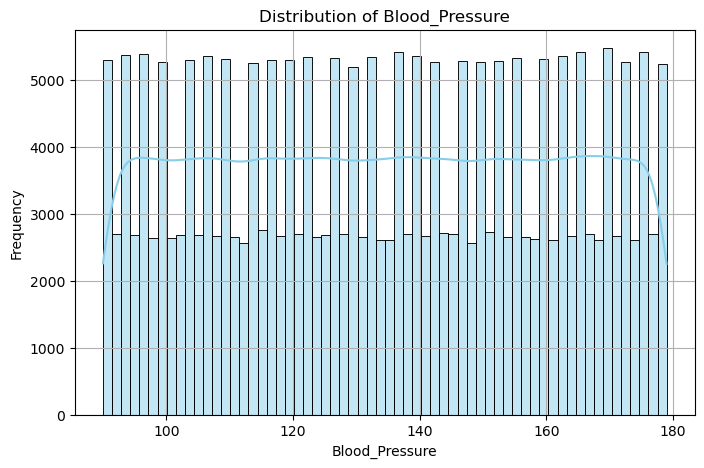

In [829]:
plot_hist_kde('Blood_Pressure',dataset)

### Boxplot (Outlier Detection)

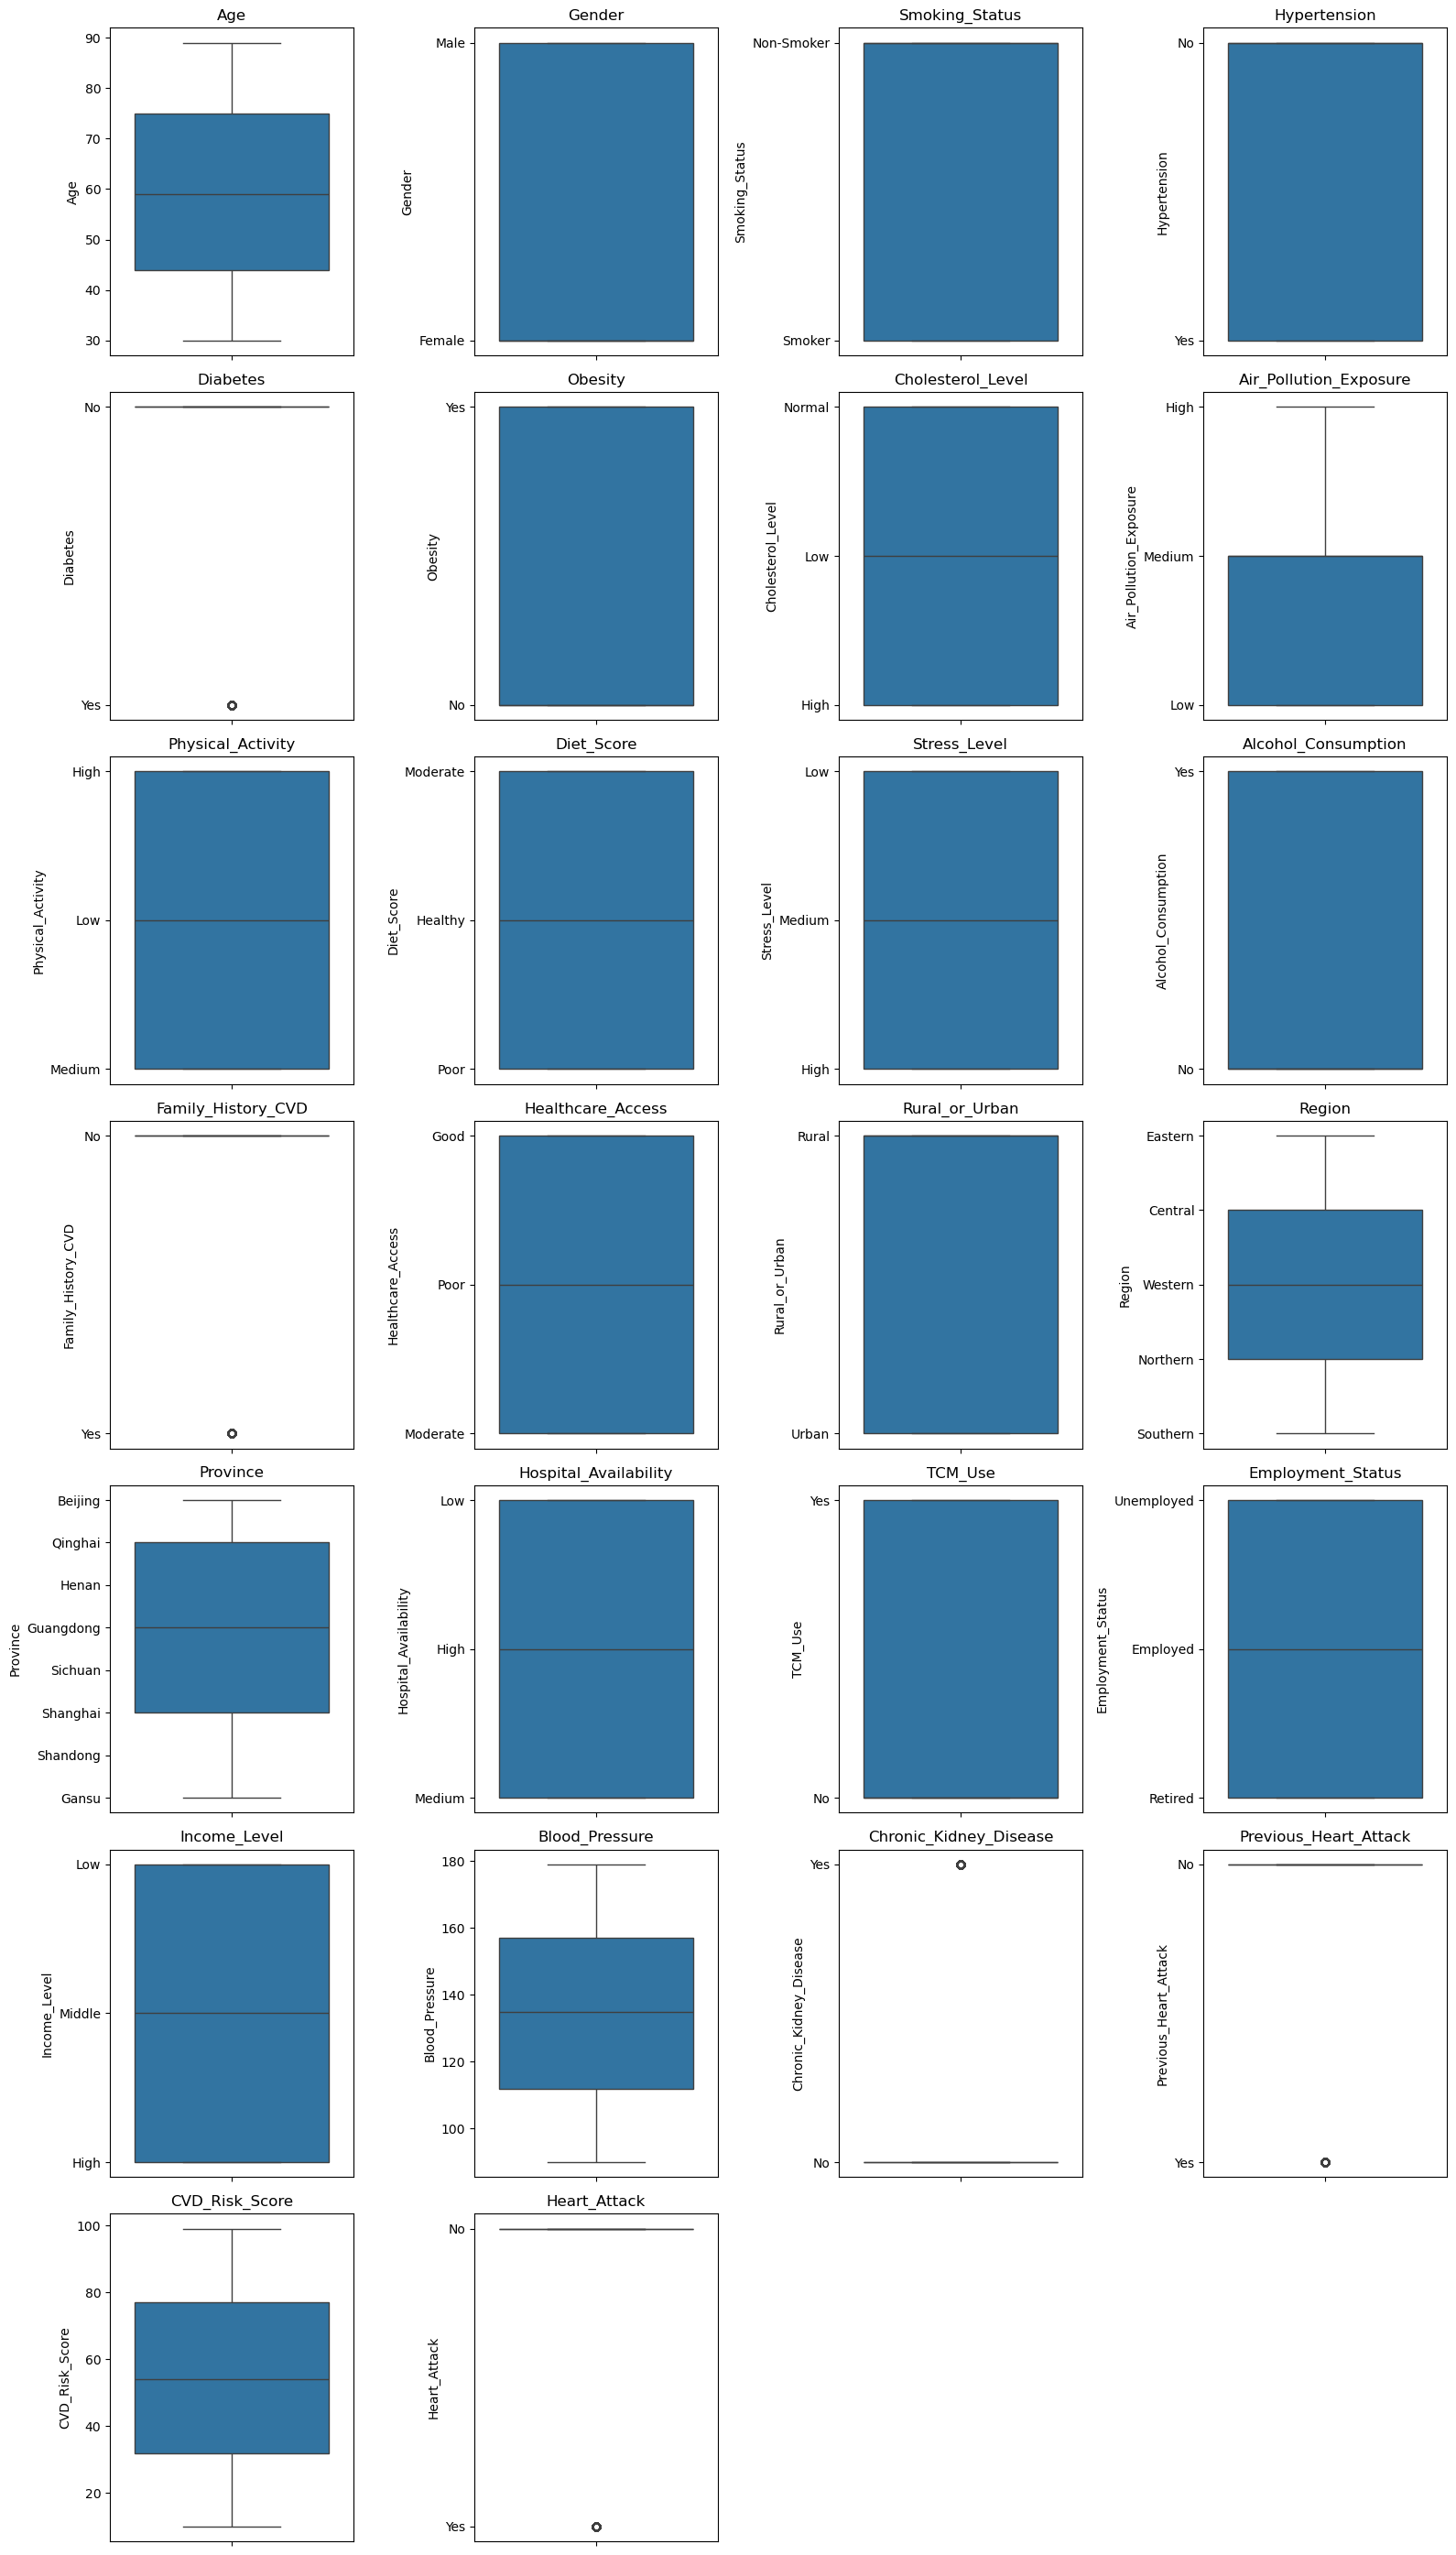

In [831]:
cols = dataset.columns
num_plots = len(cols)

# Calculate rows and columns
cols_per_row = 4
rows = math.ceil(num_plots / cols_per_row)

plt.figure(figsize=(cols_per_row * 4, rows * 4))

for i, col in enumerate(cols):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.boxplot(y=dataset[col])
    plt.title(col)

plt.tight_layout()
plt.show()


### Countplot (Categorical Variables)

In [833]:
def plot_count(col, dataset):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=dataset, palette='Set3')
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

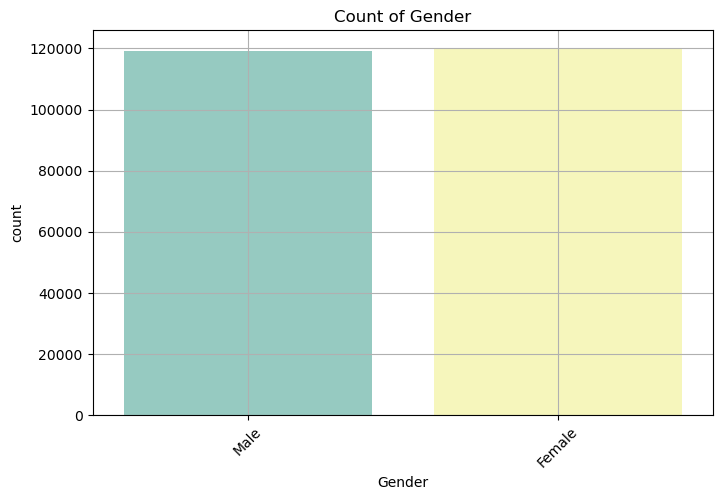

In [834]:
plot_count('Gender', dataset)

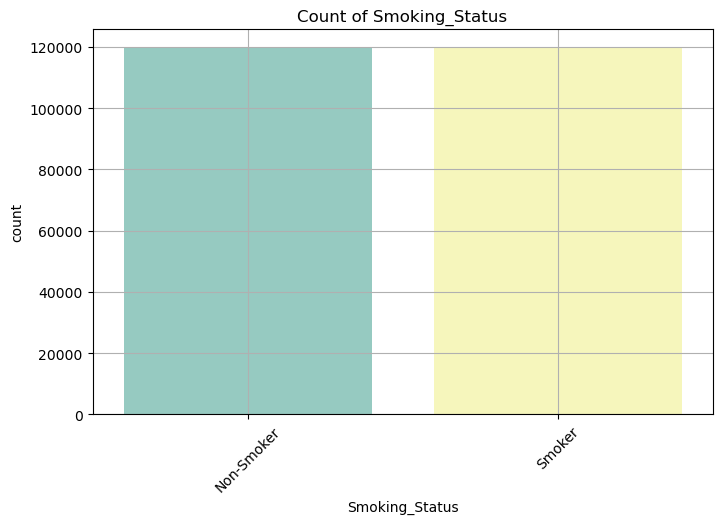

In [835]:
plot_count('Smoking_Status', dataset)

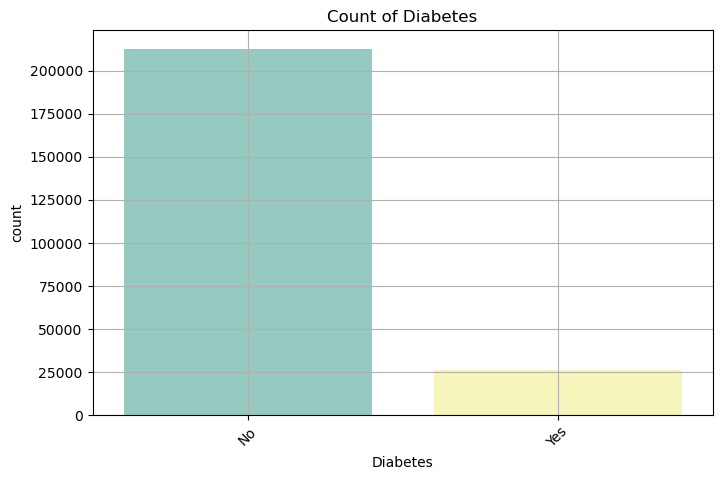

In [836]:
plot_count('Diabetes', dataset)

## Feature Engineering

#### Converting Categorical columns into Numerical columns using LabelEncoder

In [839]:
categorical_cols

['Gender',
 'Smoking_Status',
 'Hypertension',
 'Diabetes',
 'Obesity',
 'Cholesterol_Level',
 'Air_Pollution_Exposure',
 'Physical_Activity',
 'Diet_Score',
 'Stress_Level',
 'Alcohol_Consumption',
 'Family_History_CVD',
 'Healthcare_Access',
 'Rural_or_Urban',
 'Region',
 'Province',
 'Hospital_Availability',
 'TCM_Use',
 'Employment_Status',
 'Income_Level',
 'Chronic_Kidney_Disease',
 'Previous_Heart_Attack',
 'Heart_Attack']

In [840]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = dataset.select_dtypes(include='object').columns

for col in categorical_cols:
    dataset[col] = le.fit_transform(dataset[col])


In [841]:
dataset.head()

,Age,Gender,Smoking_Status,Hypertension,Diabetes,Obesity,Cholesterol_Level,Air_Pollution_Exposure,Physical_Activity,Diet_Score,...,Province,Hospital_Availability,TCM_Use,Employment_Status,Income_Level,Blood_Pressure,Chronic_Kidney_Disease,Previous_Heart_Attack,CVD_Risk_Score,Heart_Attack
0,55,1,0,0,0,1,2,0,0,1,...,0,1,1,2,1,104,1,0,78,0
1,66,0,1,1,0,0,1,2,0,0,...,4,0,0,2,2,142,0,0,49,0
2,69,0,1,0,0,0,1,2,0,1,...,3,1,0,2,0,176,0,0,31,0
3,45,0,1,0,1,0,2,2,1,0,...,4,2,1,0,1,178,0,1,23,0
4,39,0,1,0,0,0,2,2,2,0,...,2,1,0,1,2,146,1,0,79,0


In [842]:
dataset.dtypes  # Confirms all columns are now numeric

Age                       int64
Gender                    int32
Smoking_Status            int32
Hypertension              int32
Diabetes                  int32
Obesity                   int32
Cholesterol_Level         int32
Air_Pollution_Exposure    int32
Physical_Activity         int32
Diet_Score                int32
Stress_Level              int32
Alcohol_Consumption       int32
Family_History_CVD        int32
Healthcare_Access         int32
Rural_or_Urban            int32
Region                    int32
Province                  int32
Hospital_Availability     int32
TCM_Use                   int32
Employment_Status         int32
Income_Level              int32
Blood_Pressure            int64
Chronic_Kidney_Disease    int32
Previous_Heart_Attack     int32
CVD_Risk_Score            int64
Heart_Attack              int32
dtype: object

## Dividing the dataset into Independent and Dependent Features

In [844]:
# Feature and target variables
X = dataset.drop(dataset[['Heart_Attack']], axis=1)
Y = dataset['Heart_Attack']

In [845]:
X.head()

,Age,Gender,Smoking_Status,Hypertension,Diabetes,Obesity,Cholesterol_Level,Air_Pollution_Exposure,Physical_Activity,Diet_Score,...,Region,Province,Hospital_Availability,TCM_Use,Employment_Status,Income_Level,Blood_Pressure,Chronic_Kidney_Disease,Previous_Heart_Attack,CVD_Risk_Score
0,55,1,0,0,0,1,2,0,0,1,...,1,0,1,1,2,1,104,1,0,78
1,66,0,1,1,0,0,1,2,0,0,...,1,4,0,0,2,2,142,0,0,49
2,69,0,1,0,0,0,1,2,0,1,...,1,3,1,0,2,0,176,0,0,31
3,45,0,1,0,1,0,2,2,1,0,...,0,4,2,1,0,1,178,0,1,23
4,39,0,1,0,0,0,2,2,2,0,...,4,2,1,0,1,2,146,1,0,79


In [929]:
X.columns

Index(['Age', 'Gender', 'Smoking_Status', 'Hypertension', 'Diabetes',
       'Obesity', 'Cholesterol_Level', 'Air_Pollution_Exposure',
       'Physical_Activity', 'Diet_Score', 'Stress_Level',
       'Alcohol_Consumption', 'Family_History_CVD', 'Healthcare_Access',
       'Rural_or_Urban', 'Region', 'Province', 'Hospital_Availability',
       'TCM_Use', 'Employment_Status', 'Income_Level', 'Blood_Pressure',
       'Chronic_Kidney_Disease', 'Previous_Heart_Attack', 'CVD_Risk_Score'],
      dtype='object')

In [846]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Heart_Attack, dtype: int32

In [847]:
Y.value_counts()

Heart_Attack
0    210195
1     29071
Name: count, dtype: int64

## spliting the dataset into Training and Testing Set

In [849]:
from sklearn.model_selection import train_test_split

In [850]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, random_state=60)

## Feature Scaling

In [852]:
from sklearn.preprocessing import StandardScaler

In [853]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Now let's work on ANN 

In [855]:
# !pip install tensorflow

In [856]:
import tensorflow

In [857]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import ReLU,Softmax

In [858]:
ann = Sequential()

## Adding the i/p layer , Hidden layer and o/p layer

In [860]:
# Input layer
ann.add(Dense(units=25,activation='relu'))

# Hidden layer
ann.add(Dense(units=6,activation='relu'))
ann.add(Dense(units=10,activation='relu'))
ann.add(Dense(units=6,activation='relu'))

# Output layer
ann.add(Dense(units=1,activation='sigmoid'))

In [861]:
ann.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    loss_weights=None,
    metrics=['accuracy'],
)

In [862]:
# Early Stopping

early_stopping = tensorflow.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [863]:
model_history = ann.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=10,callbacks=early_stopping)

Epoch 1/10
12023/12023 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.8774 - loss: 0.3843 - val_accuracy: 0.8779 - val_loss: 0.3721
Epoch 2/10
12023/12023 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.8770 - loss: 0.3735 - val_accuracy: 0.8779 - val_loss: 0.3722
Epoch 3/10
12023/12023 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.8790 - loss: 0.3692 - val_accuracy: 0.8779 - val_loss: 0.3731
Epoch 4/10
12023/12023 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.8777 - loss: 0.3714 - val_accuracy: 0.8779 - val_loss: 0.3721
Epoch 5/10
12023/12023 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.8783 - loss: 0.3703 - val_accuracy: 0.8779 - val_loss: 0.3715
Epoch 6/10
12023/12023 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.8788 - loss: 0.3694 - val_accuracy: 0.8779 - val_loss: 0.3717
Epoch 7/10
12023/12023 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.8803 - loss: 0.3658 - val_accuracy: 0.8779 - val_loss: 0.3717
Epoch 8/10
12023/12023 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 

In [864]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [865]:
# Save the model
ann.save("heart_attack_model.h5")

## Summarize history for Accuracy and Loss

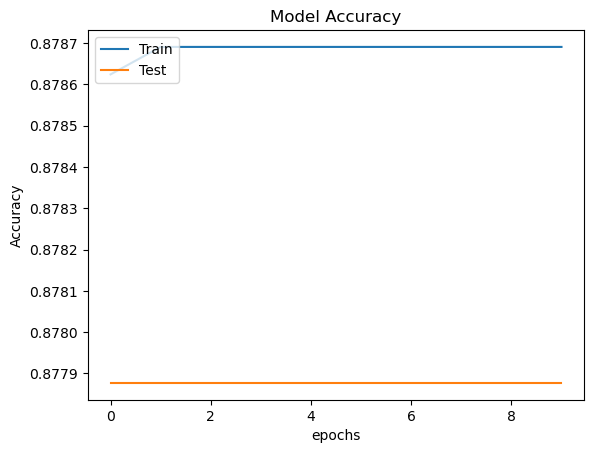

In [867]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

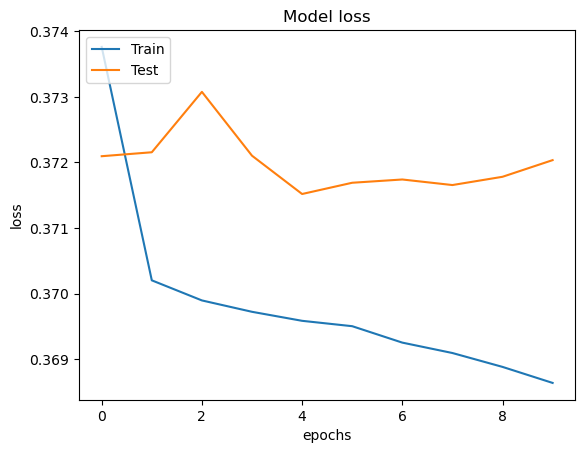

In [868]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

## Making the predictions and evaluating the model

In [870]:
y_pred = ann.predict(X_test)
y_pred = (y_pred>0.5).astype(int)
y_pred

1870/1870 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

## Make the confusion matrix

In [872]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[52563,     0],
       [ 7254,     0]], dtype=int64)

## Calculate the accuracy

In [874]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test,y_pred)
score

0.8787301268870054

## Model Deployment

In [876]:
import joblib

# Save the trained model
joblib.dump(model, 'heart_attack_model.pkl')  # Use the variable name of your trained model


['heart_attack_model.pkl']